In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive


/content/gdrive/MyDrive


In [4]:
data = pd.read_csv('/content/gdrive/MyDrive/pattern_lab_project/Insurance_Prediction.csv')
data.head()

Age  Diabetes BloodPressureProblems AnyTransplants AnyChronicDiseases  \
0   45         0                   low             no                 no   
1   60         1                   low             no                 no   
2   36         1                  high             no                 no   
3   52         1                  high             no                yes   
4   38         0                   low             no                yes   

   Height  Weight  KnownAllergies HistoryOfCancerInFamily  NumSurgeries  \
0     155      57               0                      no             0   
1     180      73               0                      no             0   
2     158      59               0                      no             1   
3     183      93               0                      no             2   
4     166      88               0                      no             1   

   Self-employed  charges  
0              0    25000  
1              0    29000  
2              0    23000  
3              1    28000  
4              0    23000

In [ ]:
data.info()

In [6]:
categoricalToNumerical = {'BloodPressureProblems':{'low':0,'high':1} ,
              'AnyTransplants':{'yes':1,'no':0},
              'AnyChronicDiseases':{'no':0,'yes':1},
              'HistoryOfCancerInFamily':{'no':0,'yes':1}
               }
data_copy = data.copy()
data_copy.replace(categoricalToNumerical, inplace=True)

In [7]:
data_copy.describe()

Age    Diabetes  BloodPressureProblems  AnyTransplants  \
count  986.000000  986.000000             986.000000      986.000000   
mean    41.745436    0.419878               0.468560        0.055781   
std     13.963371    0.493789               0.499264        0.229615   
min     18.000000    0.000000               0.000000        0.000000   
25%     30.000000    0.000000               0.000000        0.000000   
50%     42.000000    0.000000               0.000000        0.000000   
75%     53.000000    1.000000               1.000000        0.000000   
max     66.000000    1.000000               1.000000        1.000000   

       AnyChronicDiseases      Height      Weight  KnownAllergies  \
count          986.000000  986.000000  986.000000      986.000000   
mean             0.180527  168.182556   76.950304        0.215010   
std              0.384821   10.098155   14.265096        0.411038   
min              0.000000  145.000000   51.000000        0.000000   
25%              0.000000  161.000000   67.000000        0.000000   
50%              0.000000  168.000000   75.000000        0.000000   
75%              0.000000  176.000000   87.000000        0.000000   
max              1.000000  188.000000  132.000000        1.000000   

       HistoryOfCancerInFamily  NumSurgeries  Self-employed       charges  
count               986.000000    986.000000     986.000000    986.000000  
mean                  0.117647      0.667343       0.185598  24348.884381  
std                   0.322353      0.749205       0.388980   6245.077962  
min                   0.000000      0.000000       0.000000  15000.000000  
25%                   0.000000      0.000000       0.000000  21000.000000  
50%                   0.000000      1.000000       0.000000  23000.000000  
75%                   0.000000      1.000000       0.000000  28000.000000  
max                   1.000000      3.000000       1.000000  40000.000000

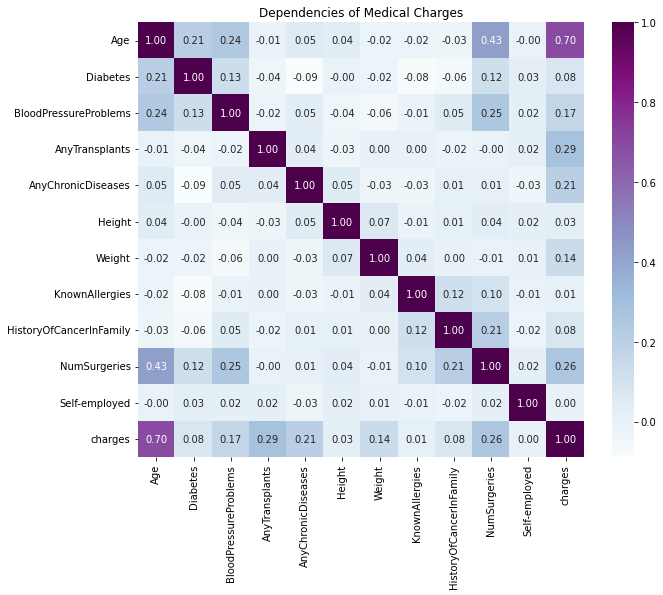

In [8]:
corr = data_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
plt.savefig('./sampleImages/Cor')
plt.show()

**Age,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Weight,NumSurgeries are important 
factors** 


In [ ]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='Age',y='charges',data=data_copy,palette='husl')

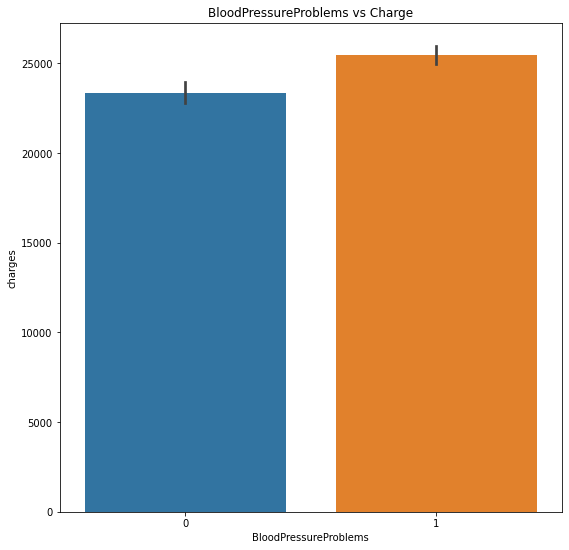

In [15]:
plt.figure(figsize=(9,9))
plt.title('BloodPressureProblems vs Charge')
sns.barplot(x='BloodPressureProblems',y='charges',data=data_copy)

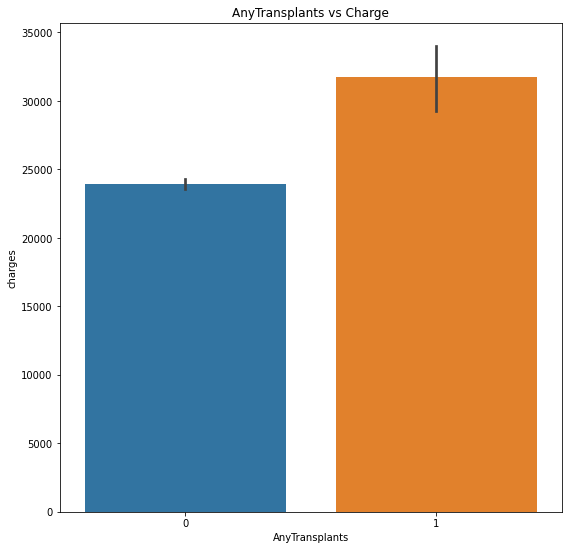

In [16]:
plt.figure(figsize=(9,9))
plt.title('AnyTransplants vs Charge')
sns.barplot(x='AnyTransplants',y='charges',data=data_copy)

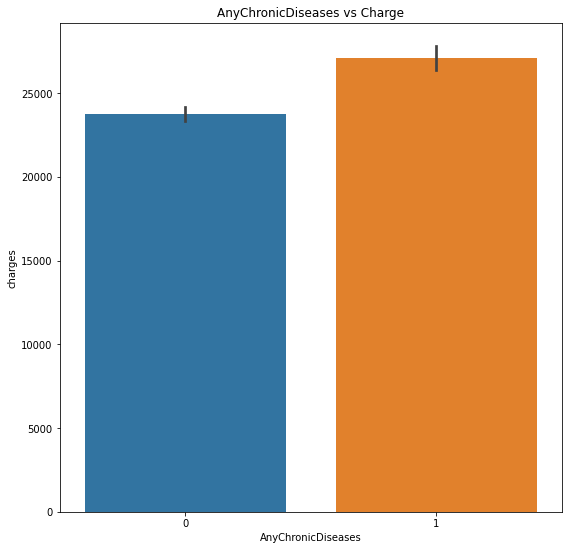

In [17]:
plt.figure(figsize=(9,9))
plt.title('AnyChronicDiseases vs Charge')
sns.barplot(x='AnyChronicDiseases',y='charges',data=data_copy)

Text(0.5, 1.0, 'Weight VS Charge')

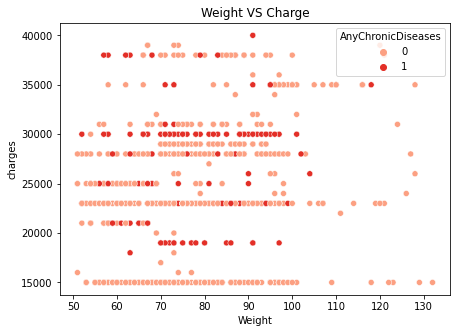

In [19]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Weight',y='charges',hue='AnyChronicDiseases',data=data_copy,palette='Reds')
plt.title('Weight VS Charge')

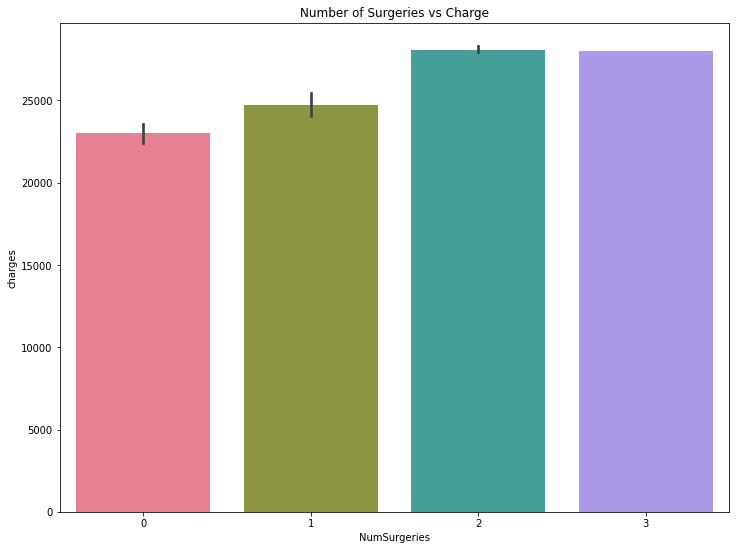

In [20]:
plt.figure(figsize=(12,9))
plt.title('Number of Surgeries vs Charge')
sns.barplot(x='NumSurgeries',y='charges',data=data_copy,palette='husl')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

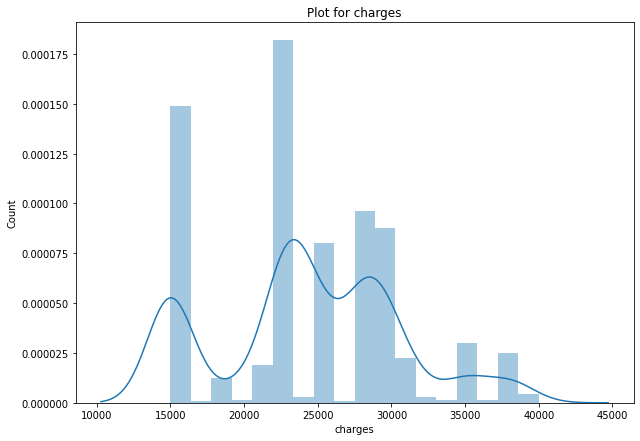

In [22]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['charges'])
plt.title('Plot for charges')
plt.xlabel('charges')
plt.ylabel('Count')

**Plotting Skew and Kurtosis**


In [21]:
print('Printing Skewness and Kurtosis for all columns')
print()
for col in list(data_copy.columns):
    print('{0} : Skewness {1:.3f} and  Kurtosis {2:.3f}'.format(col,data_copy[col].skew(),data_copy[col].kurt()))

Printing Skewness and Kurtosis for all columns

Age : Skewness 0.030 and  Kurtosis -1.132
Diabetes : Skewness 0.325 and  Kurtosis -1.898
BloodPressureProblems : Skewness 0.126 and  Kurtosis -1.988
AnyTransplants : Skewness 3.877 and  Kurtosis 13.059
AnyChronicDiseases : Skewness 1.664 and  Kurtosis 0.770
Height : Skewness -0.180 and  Kurtosis -0.762
Weight : Skewness 0.667 and  Kurtosis 0.610
KnownAllergies : Skewness 1.390 and  Kurtosis -0.069
HistoryOfCancerInFamily : Skewness 2.377 and  Kurtosis 3.658
NumSurgeries : Skewness 0.861 and  Kurtosis 0.066
Self-employed : Skewness 1.620 and  Kurtosis 0.625
charges : Skewness 0.096 and  Kurtosis -0.453


In [23]:
from sklearn.preprocessing import StandardScaler
data_pre = data_copy.copy()

tempAge = data_pre.Age
tempAge = tempAge.values.reshape(-1,1)
data_pre['Age'] = StandardScaler().fit_transform(tempAge)

tempAnyTrans = data_pre.AnyTransplants
tempAnyTrans = tempAnyTrans.values.reshape(-1,1)
data_pre['AnyTransplants'] = StandardScaler().fit_transform(tempAnyTrans)

tempChronicDis = data_pre.AnyChronicDiseases
tempChronicDis = tempChronicDis.values.reshape(-1,1)
data_pre['AnyChronicDiseases'] = StandardScaler().fit_transform(tempChronicDis)

tempNumSurg = data_pre.NumSurgeries
tempNumSurg = tempNumSurg.values.reshape(-1,1)
data_pre['NumSurgeries'] = StandardScaler().fit_transform(tempNumSurg)

tempCharges = data_pre.charges
tempCharges = tempCharges.values.reshape(-1,1)
data_pre['charges'] = StandardScaler().fit_transform(tempCharges)

data_pre.head()

Age  Diabetes  BloodPressureProblems  AnyTransplants  \
0  0.233197         0                      0       -0.243056   
1  1.307981         1                      0       -0.243056   
2 -0.411674         1                      1       -0.243056   
3  0.734763         1                      1       -0.243056   
4 -0.268369         0                      0       -0.243056   

   AnyChronicDiseases  Height  Weight  KnownAllergies  \
0           -0.469358     155      57               0   
1           -0.469358     180      73               0   
2           -0.469358     158      59               0   
3            2.130569     183      93               0   
4            2.130569     166      88               0   

   HistoryOfCancerInFamily  NumSurgeries  Self-employed   charges  
0                        0     -0.891187              0  0.104314  
1                        0     -0.891187              0  0.745143  
2                        0      0.444239              0 -0.216101  
3                        0      1.779665              1  0.584936  
4                        0      0.444239              0 -0.216101

In [24]:
X = data_pre.drop('charges',axis=1).values
y = data_pre['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (788, 11)
Size of y_train :  (788, 1)
Size of X_test :  (198, 11)
Size of Y_test :  (198, 1)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

**Linear Regression**

In [26]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [27]:
cv_linear_reg = cross_val_score(estimator = linear_reg, X = X, y = y, cv = 10)

y_pred_linear_reg_train = linear_reg.predict(X_train)
r2_score_linear_reg_train = r2_score(y_train, y_pred_linear_reg_train)

y_pred_linear_reg_test = linear_reg.predict(X_test)
r2_score_linear_reg_test = r2_score(y_test, y_pred_linear_reg_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_linear_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_linear_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_linear_reg_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

CV Linear Regression : 0.628
R2_score (train) : 0.619
R2_score (test) : 0.711
RMSE : 0.560


**Support Vector Machine (Regression)**

In [28]:
X_c = data_copy.drop('charges',axis=1).values
y_c = data_copy['charges'].values.reshape(-1,1)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c,y_c,test_size=0.2, random_state=42)

X_train_scaled = StandardScaler().fit_transform(X_train_c)
y_train_scaled = StandardScaler().fit_transform(y_train_c)
X_test_scaled = StandardScaler().fit_transform(X_test_c)
y_test_scaled = StandardScaler().fit_transform(y_test_c)

svr = SVR()

In [29]:
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }
svr_grid = GridSearchCV(estimator=svr, param_grid=parameters, cv=10, verbose=4, n_jobs=-1)
svr_grid.fit(X_train_scaled, y_train_scaled.ravel())

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['rbf', 'sigmoid'], 'tol': [0.0001]},
             verbose=4)

In [30]:
svr = SVR(C=10, gamma=0.1, tol=0.0001)
svr.fit(X_train_scaled, y_train_scaled.ravel())
print(svr_grid.best_estimator_)
print(svr_grid.best_score_)

SVR(C=10, gamma=0.01, tol=0.0001)
0.6398551761117275


In [32]:
cv_svr = svr_grid.best_score_

y_pred_svr_train = svr.predict(X_train_scaled)
r2_score_svr_train = r2_score(y_train_scaled, y_pred_svr_train)

y_pred_svr_test = svr.predict(X_test_scaled)
r2_score_svr_test = r2_score(y_test_scaled, y_pred_svr_test)

rmse_svr = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_svr_test)))

print('CV : {0:.3f}'.format(cv_svr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_svr_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_svr_test))
print('RMSE : {0:.3f}'.format(rmse_svr))

CV : 0.640
R2_score (train) : 0.848
R2 score (test) : 0.684
RMSE : 0.562


**RandomForest Regressor**

In [34]:
reg_rf = RandomForestRegressor()
parameters = { 'n_estimators':[600,1000,1200],
             'max_features': ["auto"],
             'max_depth':[40,50,60],
             'min_samples_split': [5,7,9],
             'min_samples_leaf': [7,10,12],
             'criterion': ['mse']}

reg_rf_gscv = GridSearchCV(estimator=reg_rf, param_grid=parameters, cv=10, n_jobs=-1)
reg_rf_gscv = reg_rf_gscv.fit(X_train_scaled, y_train_scaled.ravel())

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [35]:
reg_rf_gscv.best_score_, reg_rf_gscv.best_estimator_


(0.7533751935822406,
 RandomForestRegressor(criterion='mse', max_depth=40, min_samples_leaf=7,
                       min_samples_split=7, n_estimators=1200))

In [36]:
rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=12,
                       n_estimators=1200)
rf_reg.fit(X_train_scaled, y_train_scaled.ravel())

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=12,
                      n_estimators=1200)

In [37]:
cv_rf = reg_rf_gscv.best_score_

y_pred_rf_train = rf_reg.predict(X_train_scaled)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

y_pred_rf_test = rf_reg.predict(X_test_scaled)
r2_score_rf_test = r2_score(y_test_scaled, y_pred_rf_test)

rmse_rf = np.sqrt(mean_squared_error(y_test_scaled, y_pred_rf_test))

print('CV : {0:.3f}'.format(cv_rf.mean()))
print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test))
print('RMSE : {0:.3f}'.format(rmse_rf))

CV : 0.753
R2 score (train) : 0.783
R2 score (test) : 0.874
RMSE : 0.355


**Training Data without Scaling for RandomClassifier**

In [38]:
data_copy.head()

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  NumSurgeries  \
0     155      57               0                        0             0   
1     180      73               0                        0             0   
2     158      59               0                        0             1   
3     183      93               0                        0             2   
4     166      88               0                        0             1   

   Self-employed  charges  
0              0    25000  
1              0    29000  
2              0    23000  
3              1    28000  
4              0    23000

In [39]:
X_ = data_copy.drop('charges',axis=1).values
y_ = data_copy['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_,y_,test_size=0.2, random_state=42)

print('Size of X_train_ : ', X_train_.shape)
print('Size of y_train_ : ', y_train_.shape)
print('Size of X_test_ : ', X_test_.shape)
print('Size of Y_test_ : ', y_test_.shape)

Size of X_train_ :  (788, 11)
Size of y_train_ :  (788, 1)
Size of X_test_ :  (198, 11)
Size of Y_test_ :  (198, 1)


In [40]:
rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=12,
                       n_estimators=1200)
rf_reg.fit(X_train_, y_train_.ravel())

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=12,
                      n_estimators=1200)

In [41]:
y_pred_rf_train_ = rf_reg.predict(X_train_)
r2_score_rf_train_ = r2_score(y_train_, y_pred_rf_train_)

y_pred_rf_test_ = rf_reg.predict(X_test_)
r2_score_rf_test_ = r2_score(y_test_, y_pred_rf_test_)

print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train_))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test_))

R2 score (train) : 0.781
R2 score (test) : 0.867


In [42]:
import pickle

Pkl_Filename = "rf_tuned.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rf_reg, file)

In [43]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    rf_tuned_loaded = pickle.load(file)

In [45]:
rf_tuned_loaded

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=12,
                      n_estimators=1200)

In [46]:

pred=rf_tuned_loaded.predict(np.array([28,1,1,0,1,170,50,0,0,1,0]).reshape(1,11))[0]

In [47]:
print('{0:.3f}'.format(pred))

21037.911
